<a href="https://colab.research.google.com/github/komal-pasi/EDA-Capstone/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#....................................................................................................................................................

#**What is EDA?**
#**EDA means  Exploratory Data Analysis**
Exploratory Data Analysis, or EDA, is an important step in any Data Analysis or Data Science project. EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better. 

#**Some basic information about the topic of project itself.**
#**Play Store**
Google Play, formerly Android Market, is a digital distribution service operated and developed by Google. It serves as the official app store for certified devices running on the Android operating system, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. It has crossed over 82 billion app downloads with over 3.5 million published apps making it the largest app store in the world.

#Let's begin with the EDA.

Let us start with importing the required libraries for performing the analysis.

---



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now let us import the given data set for EDA from the drive.

In [4]:
ps_dataset=pd.read_csv('/content/drive/MyDrive/Capstone Dataset/Play Store Data.csv')
ps_reviews=pd.read_csv('/content/drive/MyDrive/Capstone Dataset/User Reviews.csv')

Here we will have a look on total no.of rows and columns to have an idea about the size of dataset we will work on.

So, Here we have 10841 rows and 13 columns given.

In [5]:
ps_dataset.shape

(10841, 13)

In [6]:
ps_reviews.shape

(64295, 5)

Now, we will go through the column names to check that what all data we have and accordingly will perform the futher analysis.



In [7]:
ps_dataset.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
ps_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

To know the datatype and to know the columns with maximum null values present in the given dataset.

In [9]:
ps_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
ps_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [11]:
ps_dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

So here 'Rating' column has the maximum null values and we have 4 more columns with null values.

In [12]:
ps_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Now, let's have a look inside the dataset... i.e the contents the of given dataset

In [13]:
ps_dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Let's have a look on the last 5 rows of the play store dataset.



In [14]:
ps_dataset.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Here we have displayed top 5 rows of reviews dataset.

In [15]:
ps_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Here we have displayed bottom 5 rows of reviews dataset.

In [16]:
ps_reviews.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Now, we will perform some data cleaning operations on the dataset to get clean data for EDA.

Here we have removed '+' & ',' symbols from 'Installs' columns.

In [17]:
ps_dataset['Installs']=ps_dataset['Installs'].apply(lambda i:i.replace(',' ,'') if ','  in str(i) else i)
ps_dataset['Installs']=ps_dataset['Installs'].apply(lambda i:i.replace('+','') if '+' in str(i) else i)
ps_dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


So now, let's define a function that will give us more detailed information about the given dataset such as total null values in each column, total no. of unique values in each column.
There's also a advantage of defining a function i.e we can it in future codes too...


In [18]:
def detailed_info(dataset):
    f1 = pd.DataFrame(index=dataset.columns)
    f1['count_of_nulls'] = dataset.isnull().sum()
    f1['count_of_uniques'] = dataset.nunique()
    f1['data_types'] = dataset.dtypes
    return f1

In [19]:
detailed_info(ps_dataset)

,count_of_nulls,count_of_uniques,data_types
App,0,9660,object
Category,0,34,object
Rating,1474,40,float64
Reviews,0,6002,object
Size,0,462,object
Installs,0,21,object
Type,1,3,object
Price,0,93,object
Content Rating,1,6,object
Genres,0,120,object


In [20]:
detailed_info(ps_reviews)

,count_of_nulls,count_of_uniques,data_types
App,0,1074,object
Translated_Review,26868,27994,object
Sentiment,26863,3,object
Sentiment_Polarity,26863,6195,float64
Sentiment_Subjectivity,26863,4530,float64


Now, let's start cleaning the dataset column by column. According to count of nulls mentioned above from ps_dataset.

Will start with 'Type' column. let's see which row of 'Type' column has null value.

In [21]:
ps_dataset[ps_dataset['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Now, let's fill the null value with some value with reference to other values in 'Type' column.

In [24]:
ps_dataset['Type'].fillna("Free", inplace = True)

Here we have filled the null value of 'Type' of column with 'Free' type of app. 

In [ ]:
detailed_info(ps_dataset)

,count_of_nulls,count_of_uniques,data_types
App,0,9660,object
Category,0,34,object
Rating,1474,40,float64
Reviews,0,6002,object
Size,0,462,object
Installs,0,21,object
Type,1,3,object
Price,0,93,object
Content Rating,1,6,object
Genres,0,120,object


Now, let's move to 'Rating' column.
As we can see 'Rating' column has maximum no.of null values.
we cannot add alternate values in it. As we won't be able to get the right analysis because of the alternate values.

So, will prefer to drop the null values from 'Rating' column.

In [23]:
ps_dataset.dropna(subset=['Rating'],inplace=True)

Here we have dropped all nulls values from the 'Ratings' column.

In [25]:
ps_dataset.dropna(subset=['Content Rating'], inplace=True)

Now lets fill null value in the 'Content Ratings' column with refernce to other values in it. as we did in 'Type' column.

In [26]:
ps_dataset['Content Rating'].fillna('Everyone', inplace = True)

In [27]:
detailed_info(ps_dataset)

,count_of_nulls,count_of_uniques,data_types
App,0,8196,object
Category,0,33,object
Rating,0,39,float64
Reviews,0,5992,object
Size,0,414,object
Installs,0,19,object
Type,0,2,object
Price,0,73,object
Content Rating,0,6,object
Genres,0,115,object


Now, here we are left with cleaning null values of columns as follow:
'Current Ver' & 'Android Ver'.
As these columns have more than 1 null values, will fill these null values with mode values of the respective columns.


In [28]:
ps_dataset['Current Ver'] = ps_dataset['Current Ver'].fillna(ps_dataset['Current Ver'].mode()[0])
ps_dataset['Android Ver'] = ps_dataset['Android Ver'].fillna(ps_dataset['Android Ver'].mode()[0])

In [29]:
detailed_info(ps_dataset)

,count_of_nulls,count_of_uniques,data_types
App,0,8196,object
Category,0,33,object
Rating,0,39,float64
Reviews,0,5992,object
Size,0,414,object
Installs,0,19,object
Type,0,2,object
Price,0,73,object
Content Rating,0,6,object
Genres,0,115,object


**So, finally we've cleaned all the null values from the 'ps_dataset'.**

Now, let have look on data types of the columns. There are some columns with 'object' data types which should have been int/float.
So let's check the data of these columns and convert them to correct data types 

In [30]:
ps_dataset['Reviews'] = ps_dataset['Reviews'].astype(int)

In [31]:
detailed_info(ps_dataset)

,count_of_nulls,count_of_uniques,data_types
App,0,8196,object
Category,0,33,object
Rating,0,39,float64
Reviews,0,5992,int64
Size,0,414,object
Installs,0,19,object
Type,0,2,object
Price,0,73,object
Content Rating,0,6,object
Genres,0,115,object


Now, let's replace al the dollor sign from 'Price' column and convert it's datatype into float.

In [34]:
ps_dataset['Price'] = ps_dataset['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)
ps_dataset['Price'] = ps_dataset['Price'].apply(lambda x: float(x))

Let's check if the datatype of 'Price' column is converted to float.

In [35]:
detailed_info(ps_dataset)

,count_of_nulls,count_of_uniques,data_types
App,0,8196,object
Category,0,33,object
Rating,0,39,float64
Reviews,0,5992,int64
Size,0,414,object
Installs,0,19,object
Type,0,2,object
Price,0,73,float64
Content Rating,0,6,object
Genres,0,115,object


**Operations:**


1.   Replacing String 'Varies with Device' with Nan
2.   Removing comman(,)
3.   Replacing 'M'
4.   Bringing consistency in unit by converting kilobyte into megabyte and replacing 'k
5.   Finally converting datatype into float


In [37]:
ps_dataset['Size'] = ps_dataset['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
ps_dataset['Size'] = ps_dataset['Size'].apply(lambda x: str(x).replace(',','') if 'M' in str(x) else x)
ps_dataset['Size'] = ps_dataset['Size'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)
ps_dataset['Size'] = ps_dataset['Size'].apply(lambda x: float(str(x).replace('k',''))/1000 if 'k' in str(x) else x)

####**Last Updated:**
Now will convert the data type of this feature into pandas datetime.

In [38]:
# convert it into pandas dataframe
ps_dataset['Last Updated'] = ps_dataset['Last Updated'].apply(lambda x: pd.to_datetime(x))

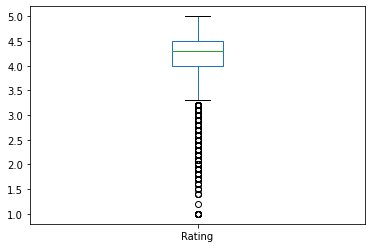

In [33]:
ps_dataset.boxplot(["Rating"]);
pt.grid(False)